In [12]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

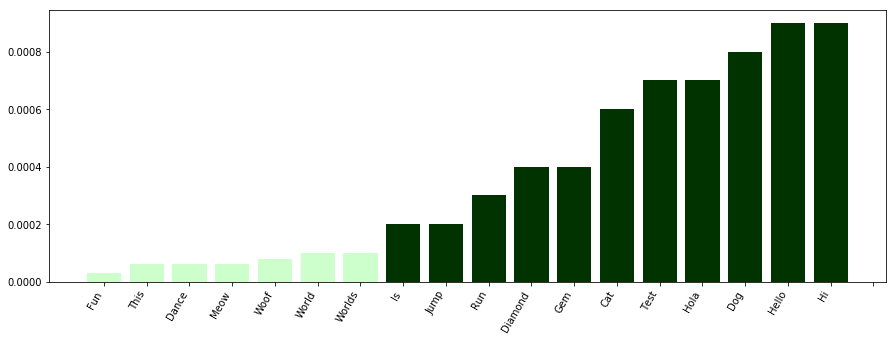

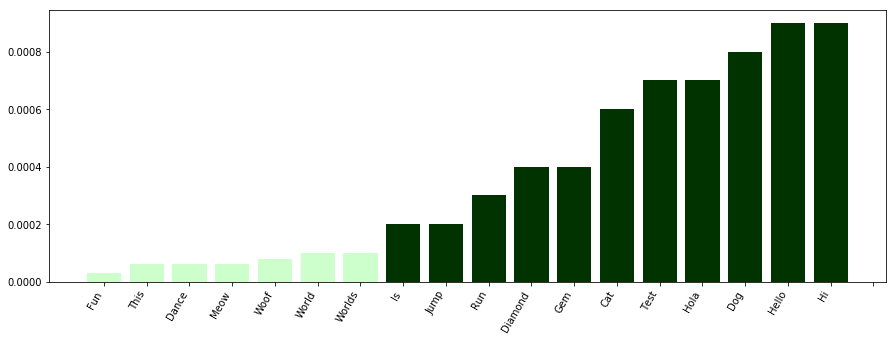

In [34]:
feature_dict = {"Hello": .0009, "World": .0001, "This": .00006, "Is": .0002, "Fun": .00003, "Test": .0007, "Cat": .0006, "Dog": .0008, "Diamond": .0004, "Hi": .0009, "Worlds": .0001, "Dance": .00006, "Jump": .0002, "Run": .0003, "Hola": .0007, "Meow": .00006, "Woof": .00008, "Gem": .0004}
senate_features = list(feature_dict.items())
house_features = list(feature_dict.items())

def plot_frequencies(features, type):
    features.sort(key=lambda x: x[1])
    feature_names = [x[0] for x in features]
    coef = [x[1] for x in features]
    top_features = int(len(feature_dict) / 2)
    
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['#003300' if c > .0001 else '#ccffcc' for c in coef]
    plt.bar(np.arange(2 * top_features), coef, color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1 + 2 * top_features), feature_names, rotation=60, ha='right')
    plt.savefig('results/'+ type +'_feature_chart.png')
    plt.show()

plot_frequencies(senate_features, "Senate")
plot_frequencies(house_features, "House")

